# Titanic Keras and Deep Learning

In [60]:
import pandas as pd
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [61]:
df1=pd.read_csv('ttrain.csv')

In [62]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df1.shape

(891, 12)

In [64]:
df2=pd.read_csv('ttest.csv')

In [65]:
df2.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [66]:
df2.shape

(418, 11)

In [67]:
df=pd.concat([df1,df2])

In [68]:
df.shape

(1309, 12)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [70]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [71]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [72]:
df.Survived.value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

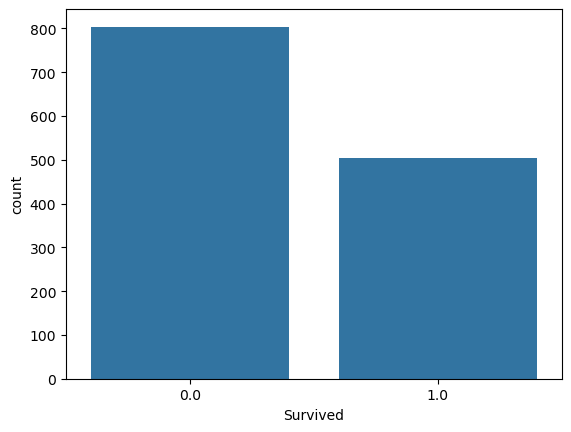

In [73]:
sns.countplot(x=df['Survived']);

In [74]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [75]:
del df['Cabin']

In [76]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [77]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [78]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [79]:
df['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [80]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [81]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [82]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [83]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [84]:
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Mme           1
Don           1
Sir           1
Lady          1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [85]:
df['Title']=df['Title'].replace(['Rev','Dr','Col','Major','Sir','Don','Capt','Jonkheer'],'Mr')

In [86]:
df['Title'].value_counts()

Title
Mr          783
Miss        260
Mrs         197
Master       61
Ms            2
Mlle          2
Mme           1
Lady          1
Countess      1
Dona          1
Name: count, dtype: int64

In [87]:
df['Title']=df['Title'].replace(['Mme','Lady','Countess','Dona'],'Mrs')

In [88]:
df['Title'].value_counts()

Title
Mr        783
Miss      260
Mrs       201
Master     61
Ms          2
Mlle        2
Name: count, dtype: int64

In [89]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')

In [90]:
df['Title'].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [91]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))

In [92]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [93]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [94]:
del df['Name']

In [95]:
del df['Ticket']

In [96]:
df['Embarked'].value_counts()

Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

In [97]:
df=pd.get_dummies(df,drop_first=True)

In [98]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,1,0.0,3,22.0,1,0,7.2500,True,False,True,False,True,False
1,2,1.0,1,38.0,1,0,71.2833,False,False,False,False,False,True
2,3,1.0,3,26.0,0,0,7.9250,False,False,True,True,False,False
3,4,1.0,1,35.0,1,0,53.1000,False,False,True,False,False,True
4,5,0.0,3,35.0,0,0,8.0500,True,False,True,False,True,False


In [99]:
train=df[:891]
test=df[891:]

In [100]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
886,887,0.0,2,27.000000,0,0,13.00,True,False,True,False,True,False
887,888,1.0,1,19.000000,0,0,30.00,False,False,True,True,False,False
888,889,0.0,3,21.824366,1,2,23.45,False,False,True,True,False,False
889,890,1.0,1,26.000000,0,0,30.00,True,False,False,False,True,False
890,891,0.0,3,32.000000,0,0,7.75,True,True,False,False,True,False


In [101]:
test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,892,NaN,3,34.5,0,0,7.8292,True,True,False,False,True,False
1,893,NaN,3,47.0,1,0,7.0000,False,False,True,False,False,True
2,894,NaN,2,62.0,0,0,9.6875,True,True,False,False,True,False
3,895,NaN,3,27.0,0,0,8.6625,True,False,True,False,True,False
4,896,NaN,3,22.0,1,1,12.2875,False,False,True,False,False,True


In [102]:
x=train.drop(['Survived','PassengerId'],axis=1)

In [103]:
y=train[['Survived']]

In [104]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,22.000000,1,0,7.2500,True,False,True,False,True,False
1,1,38.000000,1,0,71.2833,False,False,False,False,False,True
2,3,26.000000,0,0,7.9250,False,False,True,True,False,False
3,1,35.000000,1,0,53.1000,False,False,True,False,False,True
4,3,35.000000,0,0,8.0500,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,True,False,True,False,True,False
887,1,19.000000,0,0,30.0000,False,False,True,True,False,False
888,3,21.824366,1,2,23.4500,False,False,True,True,False,False
889,1,26.000000,0,0,30.0000,True,False,False,False,True,False


In [105]:
y

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [106]:
model=Sequential()
# Dense butun noron butun noron ile baglanacak anlamina gelir, activation relu en iyi calisandir
model.add(Dense(96, activation='relu')) # 1. noron hayal urunu 80 tane
model.add(Dense(144, activation='relu')) # 2. noron hayal urunu 120 tane
model.add(Dense(64, activation='relu')) # 3. noron hayal urunu 64 tane
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # classification son layer sigmoid olacak(sonu 0 veya 1 ise)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [107]:
history=model.fit(x,y, batch_size=32, validation_split=0.10, verbose=0, epochs=1000) # validation_split=0.10 ile train test split yapmaya gerek kalmadi

In [108]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 96)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 144)            │        13,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,261 (313.52 KB)

 Trainable params: 26,753 (104.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,508 (209.02 KB)

In [109]:
loss, accuracy=model.evaluate(x,y)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9169 - loss: 0.2601 


In [110]:
# accuracy 0.9169 cikti birde grafik cizdirelim

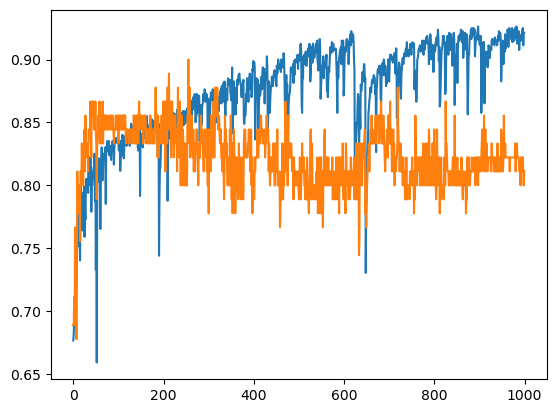

In [111]:
plt.plot(history.history['accuracy']) # gordugu data
plt.plot(history.history['val_accuracy']) # gormedigi data